In [1]:
library('tidyverse')
library('gapminder')
library('ggrepel')
library('patchwork')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Recreate this figure as best you can using the techniques we have learned:

![](02_example.png)

Work with the gapminder dataset. The following will give you four tables.
1. A table for 1952 data.
1. A table for 2002 data.
1. A table for just Kuwait in 1952. 
1. A table for just Kuwait in 2002. 

In [2]:
df.1952 = gapminder %>% filter(year == 1952)
df.2002 = gapminder %>% filter(year == 2002)
df.1952.kuwait = df.1952 %>% filter(country == 'Kuwait') 
df.2002.kuwait = df.2002 %>% filter(country == 'Kuwait') 

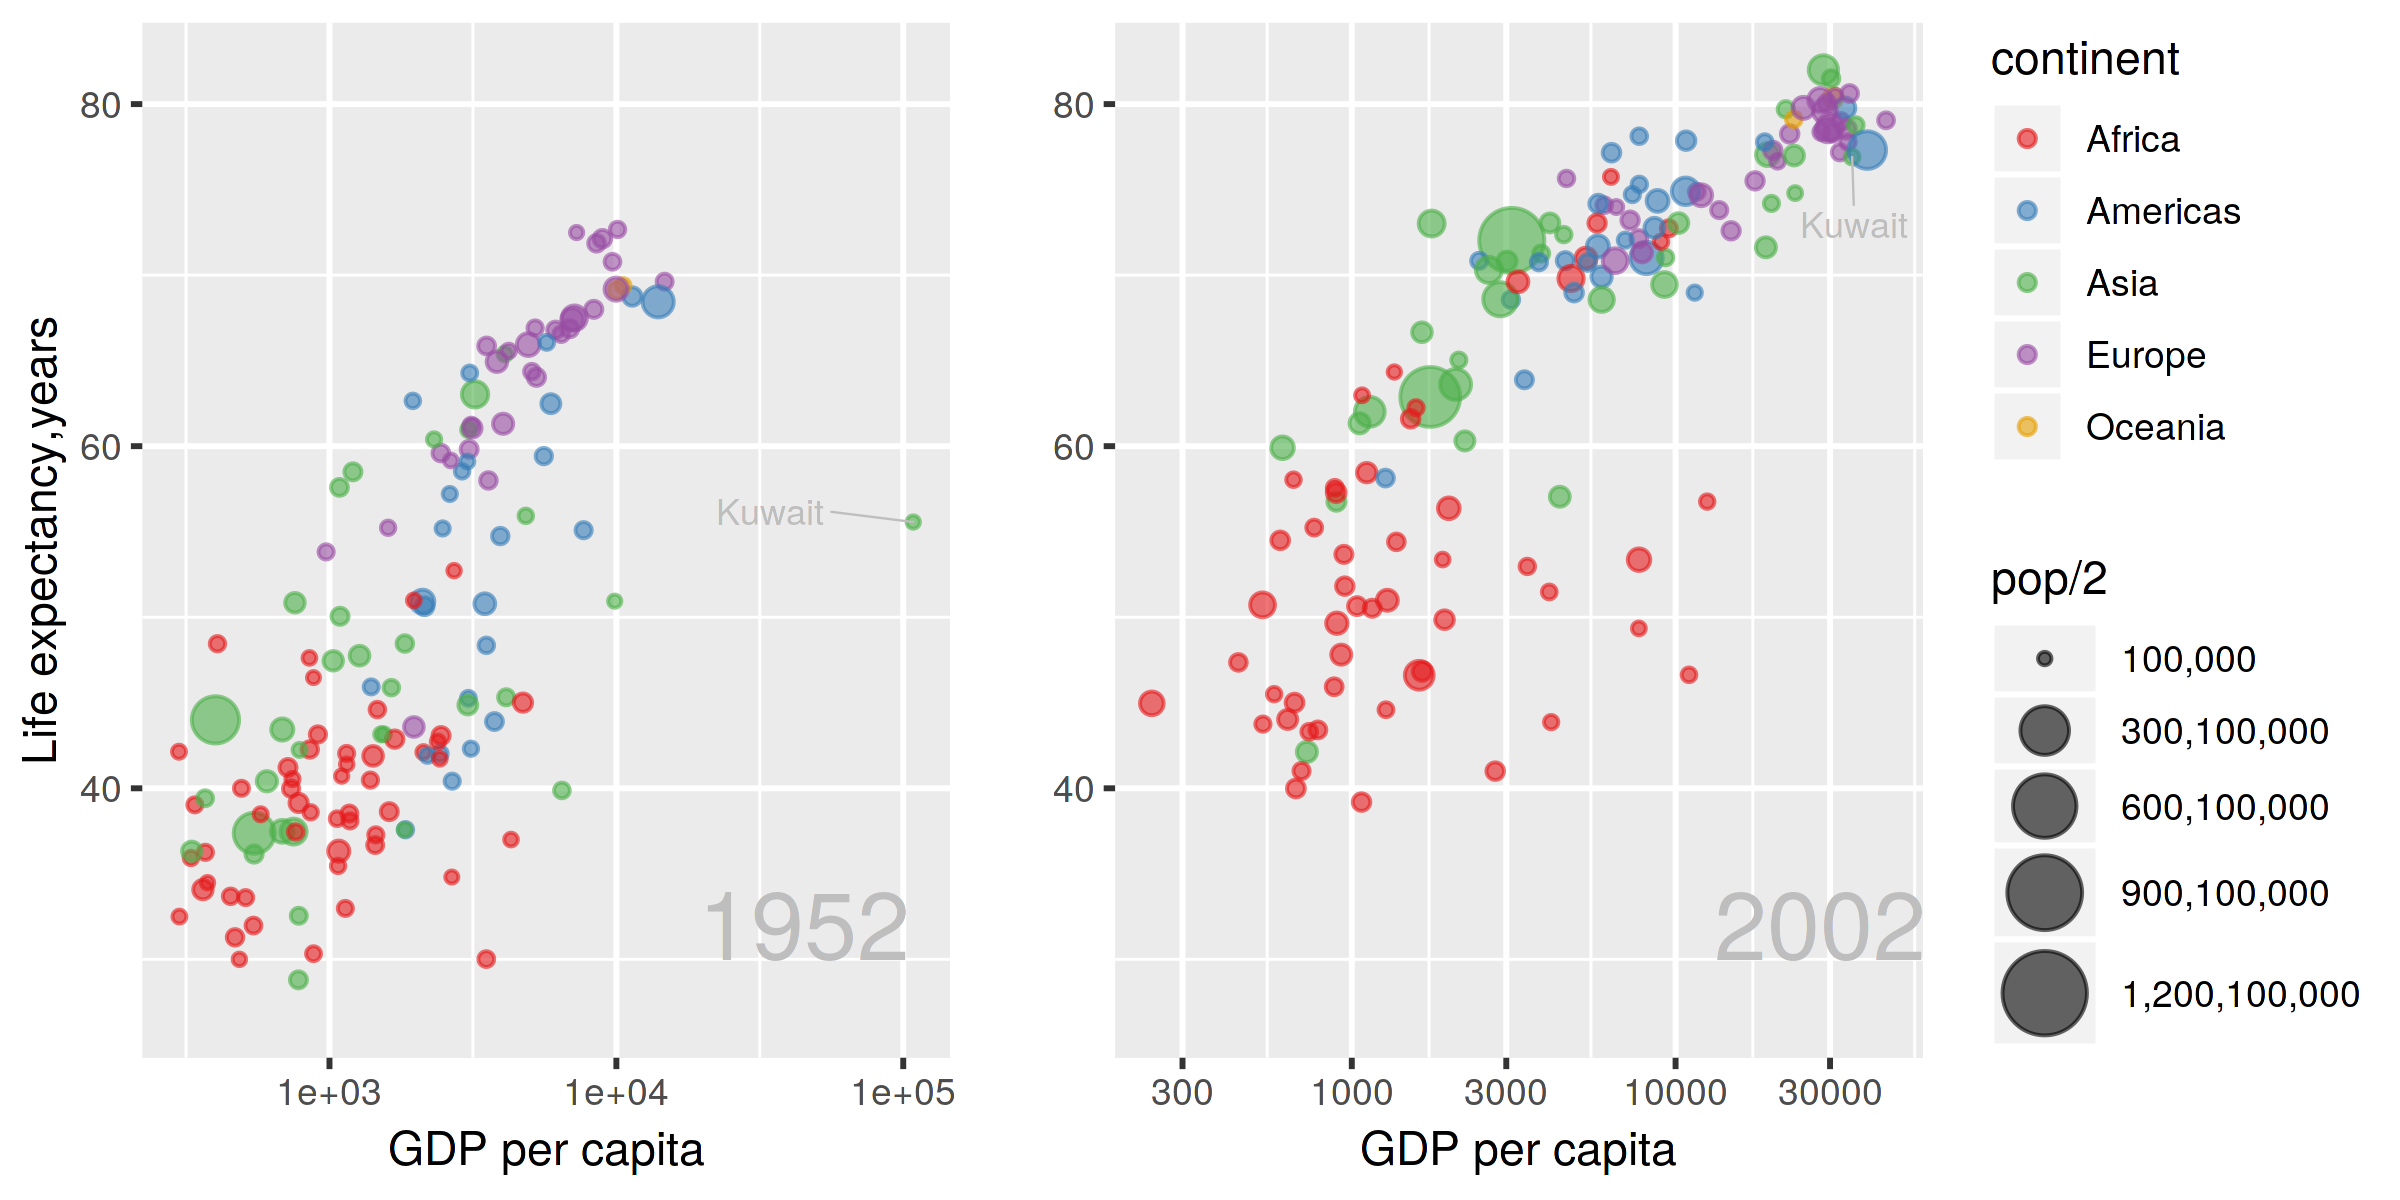

In [4]:
options(repr.plot.res = 300, repr.plot.width = 8, repr.plot.height = 4)

p = ggplot(df.1952, aes(x = gdpPercap, y = lifeExp,color = continent,size = pop/2),show.legend = False)

p = p + geom_point(alpha = 0.6)

p = p + geom_text_repel(data = df.1952.kuwait,
                        segment.color = 'grey',
                        segment.size = 0.2,
                        color = 'grey',
                        aes(x = gdpPercap, y = lifeExp, label = country), 
                        size = 3,
                        nudge_x = -0.5,
                        nudge_y = 0.6)

p = p + annotate("text",x= 4.5e+4,y= 32 ,label = "1952",size = 8, color = 'grey')

p = p + scale_color_manual(values = c('#e41a1c',
                                      '#377eb8',
                                      '#4daf4a',
                                      '#984ea3',
                                      '#E69F00'))

p = p + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)

p = p + theme(legend.position = 'none',
              strip.background = element_blank())

p = p + ylim(c(27, 82))

p = p + scale_x_log10()

p = p + labs(y = 'Life expectancy,years', x = 'GDP per capita')

p = p + scale_alpha(guide =FALSE)





p2 = ggplot(df.2002, aes(x = gdpPercap, y = lifeExp,color = continent,size = pop/2),show.legend = False)

p2 = p2 + geom_point(alpha = 0.6)

p2 = p2 + geom_text_repel(data = df.2002.kuwait,
                        segment.color = 'grey',
                        segment.size = 0.2,
                        color = 'grey',
                        aes(x = gdpPercap, y = lifeExp, label = country), 
                        size = 3,
                        nudge_x = 6,
                        nudge_y = -4)

p2 = p2 + annotate("text",x= 2.8e+4,y= 32 ,label = "2002",size = 8, color = 'grey')

p2 = p2 + scale_color_manual(values = c('#e41a1c',
                                      '#377eb8',
                                      '#4daf4a',
                                      '#984ea3',
                                      '#E69F00'))

p2 = p2 + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)


p2 = p2 + ylim(c(27, 82))

p2 = p2 + scale_x_log10()

p2 = p2 + labs( y = '',x = 'GDP per capita')

p2 = p2 + scale_alpha(guide =FALSE)

p + p2


## Hints!

These snippets will help you to get the legends and scales as they're set in the example.

- This is how the size scale is set:

```R
p = p + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)
```  

- This is how the `y-axis` is fixed for each plot:

```R
p = p + ylim(c(27, 82))
```

- This will set the `x-axis` to a log-scale:

```R
p = p + scale_x_log10()
```

- The `annotate` function is useful for adding text to a figure that's not mapped to data. [annotate documentation](https://ggplot2.tidyverse.org/reference/annotate.html). 

- Don't forget about third-party packages like `ggrepel` and `patchwork`!